C:\Users\sejal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


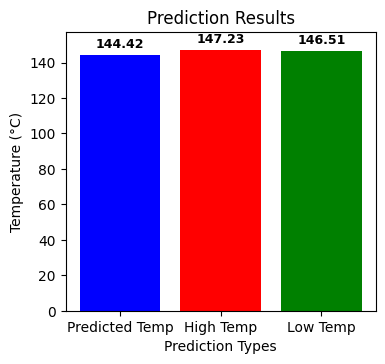

In [15]:
import tkinter as tk
from tkinter import messagebox, ttk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import joblib

# Load trained models
rf_temp_model = joblib.load('random_forest_model.pkl')
mlp_temp_model = joblib.load('mlp_regressor_model.pkl')  # Changed model name

rf_aqi_model = joblib.load('random_forest_aqi.pkl')
mlp_aqi_model = joblib.load('mlp_classifier_aqi.pkl')

# Creating Tkinter GUI
root = tk.Tk()
root.title("Weather & AQI Prediction App")
root.geometry("600x750")

# Dropdown to select prediction type
tk.Label(root, text="Select Prediction Type", font=("Arial", 12, "bold")).pack()
prediction_type_var = tk.StringVar()
prediction_type_dropdown = ttk.Combobox(root, textvariable=prediction_type_var, values=["Temperature", "AQI"], state="readonly")
prediction_type_dropdown.pack()
prediction_type_dropdown.current(0)

entry_labels_temp = ["AQI", "PM1 (µg/m³)", "PM2.5 (µg/m³)", "PM10 (µg/m³)", "Humidity (%)", "Dew Point (°C)", "Wet Bulb (°C)", "Heat Index (°C)"]
entry_labels_aqi = ["PM1 (µg/m³)", "PM2.5 (µg/m³)", "PM10 (µg/m³)", "Temp (°C)", "Humidity (%)", "Dew Point (°C)", "Wet Bulb (°C)", "Heat Index (°C)"]
entries = []

entry_frame = tk.Frame(root)
entry_frame.pack(pady=10)

last_predicted_values = []
last_labels = []
last_ylabel = ""

def update_entries():
    for widget in entry_frame.winfo_children():
        widget.destroy()

    tk.Label(entry_frame, text="Enter Parameters", font=("Arial", 12, "bold")).pack()
    labels = entry_labels_temp if prediction_type_var.get() == "Temperature" else entry_labels_aqi
    entries.clear()
    for label in labels:
        tk.Label(entry_frame, text=label).pack()
        entry = tk.Entry(entry_frame)
        entry.pack()
        entries.append(entry)

prediction_type_dropdown.bind("<<ComboboxSelected>>", lambda e: update_entries())
update_entries()

def predict():
    global last_predicted_values, last_labels, last_ylabel
    try:
        new_data = np.array([[float(entry.get()) for entry in entries]])
        prediction_type = prediction_type_var.get()

        if prediction_type == "Temperature":
            rf_pred = rf_temp_model.predict(new_data)
            mlp_pred = mlp_temp_model.predict(new_data)
            rf_pred = np.array(rf_pred)
            mlp_pred = np.array(mlp_pred)
            predicted_temp = (rf_pred + mlp_pred) / 2
            pred_temp, pred_high, pred_low = predicted_temp[0]
            result_label.config(text=f"Predicted Temp: {pred_temp:.2f} °C\n"
                                     f"Predicted High Temp: {pred_high:.2f} °C\n"
                                     f"Predicted Low Temp: {pred_low:.2f} °C")
            last_predicted_values = [pred_temp, pred_high, pred_low]
            last_labels = ['Predicted Temp', 'High Temp', 'Low Temp']
            last_ylabel = "Temperature (°C)"

        elif prediction_type == "AQI":
            rf_pred = rf_aqi_model.predict(new_data)
            mlp_pred = mlp_aqi_model.predict(new_data)
            predicted_aqi = (rf_pred.flatten() + mlp_pred.flatten()) / 2
            result_label.config(text=f"Predicted AQI: {float(predicted_aqi[0]):.2f}")
            last_predicted_values = [float(predicted_aqi[0])]
            last_labels = ['Predicted AQI']
            last_ylabel = "AQI Value"

        show_graph()  # Update graph automatically after prediction

    except ValueError as e:
        messagebox.showerror("Input Error", f"Please enter valid numerical values.\nError: {str(e)}")

# Frame for displaying the graph
graph_frame = tk.Frame(root)
graph_frame.pack(pady=10)

def show_graph():
    for widget in graph_frame.winfo_children():  # Clear previous graph
        widget.destroy()

    if not last_predicted_values:
        messagebox.showinfo("No Prediction", "Please predict first before showing the graph.")
        return

    fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
    bars = ax.bar(last_labels, last_predicted_values, color=['blue', 'red', 'green'][:len(last_predicted_values)])
    ax.set_xlabel("Prediction Types")
    ax.set_ylabel(last_ylabel)
    ax.set_title("Prediction Results")
    ax.set_ylim(0, max(last_predicted_values) + 10)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

    canvas = FigureCanvasTkAgg(fig, master=graph_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

# Buttons and result display
tk.Button(root, text="Predict", command=predict).pack(pady=5)
result_label = tk.Label(root, text="", font=("Arial", 12))
result_label.pack()

# tk.Button(root, text="Show Graph", command=show_graph).pack(pady=5)

root.mainloop()


C:\Users\sejal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


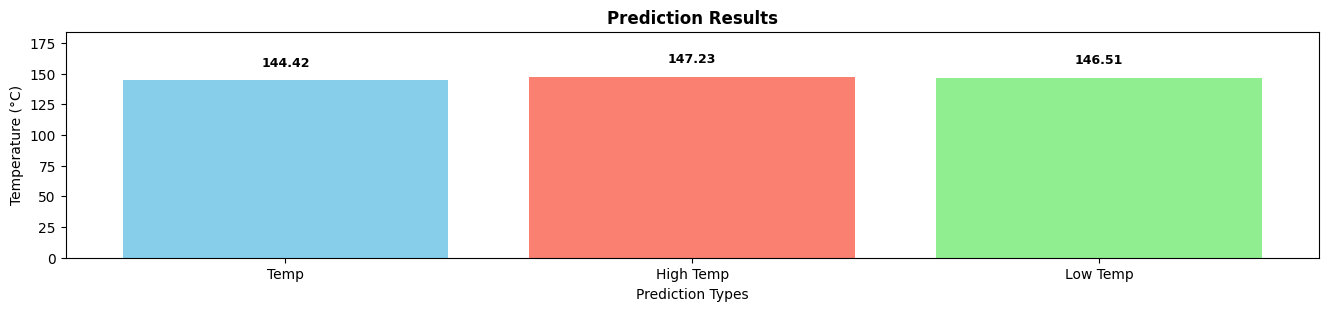

In [18]:
import tkinter as tk
from tkinter import messagebox, ttk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import joblib

# Load trained models
rf_temp_model = joblib.load('random_forest_model.pkl')
mlp_temp_model = joblib.load('mlp_regressor_model.pkl')

rf_aqi_model = joblib.load('random_forest_aqi.pkl')
mlp_aqi_model = joblib.load('mlp_classifier_aqi.pkl')

# Creating Tkinter GUI
root = tk.Tk()
root.title("Weather & AQI Prediction App")
root.geometry("600x800")

# Dropdown to select prediction type
tk.Label(root, text="Select Prediction Type", font=("Arial", 12, "bold")).pack(pady=(10, 5))
prediction_type_var = tk.StringVar()
prediction_type_dropdown = ttk.Combobox(root, textvariable=prediction_type_var, values=["Temperature", "AQI"], state="readonly")
prediction_type_dropdown.pack()
prediction_type_dropdown.current(0)

entry_labels_temp = ["AQI", "PM1 (µg/m³)", "PM2.5 (µg/m³)", "PM10 (µg/m³)", "Humidity (%)", "Dew Point (°C)", "Wet Bulb (°C)", "Heat Index (°C)"]
entry_labels_aqi = ["PM1 (µg/m³)", "PM2.5 (µg/m³)", "PM10 (µg/m³)", "Temp (°C)", "Humidity (%)", "Dew Point (°C)", "Wet Bulb (°C)", "Heat Index (°C)"]
entries = []

entry_frame = tk.Frame(root)
entry_frame.pack(pady=10)

last_predicted_values = []
last_labels = []
last_ylabel = ""

def update_entries():
    for widget in entry_frame.winfo_children():
        widget.destroy()

    tk.Label(entry_frame, text="Enter Parameters", font=("Arial", 12, "bold")).pack()
    labels = entry_labels_temp if prediction_type_var.get() == "Temperature" else entry_labels_aqi
    entries.clear()
    for label in labels:
        tk.Label(entry_frame, text=label).pack()
        entry = tk.Entry(entry_frame)
        entry.pack()
        entries.append(entry)

prediction_type_dropdown.bind("<<ComboboxSelected>>", lambda e: update_entries())
update_entries()

def predict():
    global last_predicted_values, last_labels, last_ylabel
    try:
        new_data = np.array([[float(entry.get()) for entry in entries]])
        prediction_type = prediction_type_var.get()

        if prediction_type == "Temperature":
            rf_pred = rf_temp_model.predict(new_data)
            mlp_pred = mlp_temp_model.predict(new_data)
            rf_pred = np.array(rf_pred)
            mlp_pred = np.array(mlp_pred)
            predicted_temp = (rf_pred + mlp_pred) / 2
            pred_temp, pred_high, pred_low = predicted_temp[0]
            result_label.config(text=f"Predicted Temp: {pred_temp:.2f} °C\n"
                                     f"Predicted High Temp: {pred_high:.2f} °C\n"
                                     f"Predicted Low Temp: {pred_low:.2f} °C")
            last_predicted_values = [pred_temp, pred_high, pred_low]
            last_labels = ['Temp', 'High Temp', 'Low Temp']
            last_ylabel = "Temperature (°C)"

        elif prediction_type == "AQI":
            rf_pred = rf_aqi_model.predict(new_data)
            mlp_pred = mlp_aqi_model.predict(new_data)
            predicted_aqi = (rf_pred.flatten() + mlp_pred.flatten()) / 2
            result_label.config(text=f"Predicted AQI: {float(predicted_aqi[0]):.2f}")
            last_predicted_values = [float(predicted_aqi[0])]
            last_labels = ['Predicted AQI']
            last_ylabel = "AQI Value"

        show_graph()

    except ValueError as e:
        messagebox.showerror("Input Error", f"Please enter valid numerical values.\nError: {str(e)}")

# Frame for displaying the graph with padding and title
graph_frame = tk.LabelFrame(root, text="Prediction Graph", padx=10, pady=10,
                            font=("Arial", 10, "bold"), relief=tk.GROOVE, bd=2)
graph_frame.pack(pady=15, fill="both", expand=True)

def show_graph():
    for widget in graph_frame.winfo_children():
        widget.destroy()

    if not last_predicted_values:
        messagebox.showinfo("No Prediction", "Please predict first before showing the graph.")
        return

    fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
    bars = ax.bar(last_labels, last_predicted_values, color=['skyblue', 'salmon', 'lightgreen'][:len(last_predicted_values)])

    ax.set_xlabel("Prediction Types", fontsize=10)
    ax.set_ylabel(last_ylabel, fontsize=10)
    ax.set_title("Prediction Results", fontsize=12, fontweight='bold')

    ax.set_ylim(0, max(last_predicted_values) * 1.25)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 8),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold')

    fig.tight_layout()
    canvas = FigureCanvasTkAgg(fig, master=graph_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill='both', expand=True)

# Buttons and result display
tk.Button(root, text="Predict", command=predict).pack(pady=10)
result_label = tk.Label(root, text="", font=("Arial", 12))
result_label.pack()

root.mainloop()


In [15]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import random

# Dummy prediction function
def make_prediction():
    values = [entry.get() for entry in input_entries]
    print("Input values:", values)

    predictions = [random.uniform(150, 170) for _ in range(3)]
    show_bar_chart(predictions)

    predict_btn.config(state=tk.DISABLED)

def enable_predict_button(event):
    predict_btn.config(state=tk.NORMAL)

def show_bar_chart(predictions):
    # Clear previous widgets from graph_frame
    for widget in graph_frame.winfo_children():
        widget.destroy()

    # Create a new figure and axis
    fig = plt.Figure(figsize=(5, 3))
    ax = fig.add_subplot(111)

    categories = ['Temp', 'High Temp', 'Low Temp']
    colors = ['skyblue', 'salmon', 'lightgreen']

    bars = ax.bar(categories, predictions, color=colors)

    # Find maximum prediction value to set y-limit a bit higher
    max_pred = max(predictions)
    ax.set_ylim(0, max_pred + 20)  # Add margin at the top

    for bar, val in zip(bars, predictions):
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 2,  # Offset slightly from top of the bar
                f'{val:.2f}',
                ha='center', va='bottom', fontweight='bold')

    ax.set_ylabel('Temperature (°C)')
    ax.set_title('Prediction Results')
    fig.tight_layout()

    canvas = FigureCanvasTkAgg(fig, master=graph_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill='both', expand=True)

# Main Window
root = tk.Tk()
root.title("Weather & AQI Prediction App")
root.geometry("1000x700")

# Prediction Type Dropdown
tk.Label(root, text="Select Prediction Type", font=("Arial", 10, "bold")).pack(pady=(10, 0))
prediction_type = ttk.Combobox(root, values=["Temperature", "AQI"], state="readonly")
prediction_type.current(0)
prediction_type.pack(pady=(0, 10))

# Input Entries
tk.Label(root, text="Enter Parameters", font=("Arial", 10, "bold")).pack()
inputs = ["PM1 (ug/m³)", "PM2.5 (ug/m³)", "PM10 (ug/m³)", "Humidity (%)",
          "Dew Point (°C)", "Wet Bulb (°C)", "Heat Index (°C)"]
input_entries = []

for label in inputs:
    tk.Label(root, text=label).pack()
    entry = tk.Entry(root)
    entry.pack()
    entry.bind("<KeyRelease>", enable_predict_button)
    input_entries.append(entry)

# Predict Button
predict_btn = tk.Button(root, text="Predict", command=make_prediction)
predict_btn.pack(pady=10)

# Graph Frame
tk.Label(root, text="Prediction Graph", font=("Arial", 9, "bold"), anchor="w").pack(fill='x', padx=10)
graph_frame = tk.Frame(root)
graph_frame.pack(fill='both', expand=True)

root.mainloop()


Input values: ['11', '55', '56', '68', '68', '59', '68']


In [14]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import tkinter as tk
from tkinter import ttk
from tkinter import scrolledtext
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# --- Load model & data ---
model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler_temp.pkl")
df = pd.read_csv("merged_weather_7months_cleaned.csv")
df['Date'] = pd.to_datetime(df['Date & Time'], errors='coerce').dt.strftime('%Y-%m-%d')
df.dropna(subset=['Date'], inplace=True)

feature_columns = ["Temp - °C", "Hum - %", "AQI"]

# --- Interpretation ---
def interpret_weather(temp, humidity, aqi):
    mood = []
    mood.append("🔥 Hot" if temp > 35 else "❄️ Cold" if temp < 20 else "☁ Mild")
    mood.append("💦 Humid" if humidity > 70 else "🍵 Dry" if humidity < 30 else "ἲc️ Comfortable")
    mood.append("🚑 Poor AQI" if aqi > 150 else "⚠️ Moderate AQI" if aqi > 100 else "✅ Good AQI")
    return ", ".join(mood)

# --- Prediction ---
def predict_weather(days):
    output = ""
    graph_data = {"dates": [], "temp": [], "hum": [], "aqi": []}
    today = datetime.now()

    for i in range(days):
        target_date = today + timedelta(days=i)
        mapped = target_date.replace(year=2024)
        date_str = mapped.strftime('%Y-%m-%d')
        row = df[df['Date'] == date_str]
        estimated = False

        if row.empty:
            day, month = mapped.day, mapped.month
            row = df[pd.to_datetime(df['Date'], errors='coerce').dt.day == day]
            row = row[pd.to_datetime(row['Date'], errors='coerce').dt.month == month]
            estimated = True

        if row.empty:
            row = df[pd.to_datetime(df['Date'], errors='coerce').dt.month == month]
            estimated = True

        min_temp = row["Temp - °C"].min()
        max_temp = row["Temp - °C"].max()
        mean_temp = row["Temp - °C"].mean()

        min_hum = row["Hum - %"].min()
        max_hum = row["Hum - %"].max()
        mean_hum = row["Hum - %"].mean()

        min_aqi = row["AQI"].min()
        max_aqi = row["AQI"].max()
        mean_aqi = row["AQI"].mean()

        features = [[mean_temp, mean_hum, mean_aqi]]
        scaled = scaler.transform(features)
        pred_temp = model.predict(scaled)[0]

        summary = interpret_weather(pred_temp, mean_hum, mean_aqi)

        output += f"🗖 {target_date.strftime('%A, %d %B %Y')}  \n"
        output += f"🌡 Temp Range: {min_temp:.1f}°C – {max_temp:.1f}°C  \n"
        output += f"💧 Humidity Range: {min_hum:.1f}% – {max_hum:.1f}%  \n"
        output += f"🌫 AQI Range: {min_aqi:.0f} – {max_aqi:.0f}  \n"
        output += f"🧾 Averages → Temp: {mean_temp:.1f}°C | Humidity: {mean_hum:.1f}% | AQI: {mean_aqi:.0f}  \n"
        output += f"🔍 Prediction → 🌡 {pred_temp:.1f}°C | 💧 {mean_hum:.0f}% | 🌫 AQI {mean_aqi:.0f}  \n"
        output += f"📝 Summary: {summary}"
        output += " 📊 (Estimated)" if estimated else ""
        output += "\n"
        output += f"🎨 Conditions: \n"
        output += f"   ➤ Temperature feels like: {'🔥 Very Hot 🥵' if pred_temp > 38 else '☀️ Warm 😊' if pred_temp > 30 else '🌤 Pleasant 😌' if pred_temp > 20 else '❄️ Cold 🧣'}\n"
        output += f"   ➤ Humidity level: {'💦 Very Humid 😓' if mean_hum > 75 else '🌫 Moderate 🌥️' if mean_hum > 45 else '🌵 Dry & Comfortable 😎'}\n"
        output += f"   ➤ Air Quality: {'🚨 Hazardous 💀' if mean_aqi > 200 else '⚠️ Not Great 😷' if mean_aqi > 150 else '😐 Acceptable 👍' if mean_aqi > 100 else '💚 Clean & Fresh 🍃'}\n"
        output += "—" * 60 + "\n"

        graph_data["dates"].append(target_date)
        graph_data["temp"].append(pred_temp)
        graph_data["hum"].append(mean_hum)
        graph_data["aqi"].append(mean_aqi)

    return output, graph_data

# --- UI Setup ---
root = tk.Tk()
root.title("🌈 Sejal's Stylish Weather App")
root.geometry("900x650")
root.configure(bg="#e6f2ff")

# --- Header ---
tk.Label(root, text="⛅️ Weather Prediction", font=("Helvetica", 20, "bold"),
         bg="#e6f2ff", fg="#003366").pack(pady=15)

# --- Dropdown options ---
forecast_options = [
    "Today", "Tomorrow", "Next 2 Days", "Next 3 Days", "Next 4 Days", "Next 5 Days",
    "Next 6 Days", "Next 7 Days", "Next 2 Weeks", "Next 1 Month", "Next 2 Months"
]
style = ttk.Style()
style.theme_use("clam")
style.configure("TCombobox", fieldbackground="#ffffff", background="#d9e6f2")

combo = ttk.Combobox(root, values=forecast_options, font=("Helvetica", 13), width=25)
combo.set("Tomorrow")
combo.pack(pady=10)

# --- Output Frame ---
frame = tk.Frame(root, bg="white", bd=3, relief="groove")
frame.pack(padx=20, pady=10, fill=tk.BOTH, expand=True)

output_box = scrolledtext.ScrolledText(frame, wrap=tk.WORD, font=("Consolas", 11),
                                       bg="white", fg="#333", padx=10, pady=10, bd=0)
output_box.pack(fill=tk.BOTH, expand=True)

# --- Show Chart Checkbox ---
show_chart_var = tk.IntVar()
tk.Checkbutton(root, text="Show Graphs", variable=show_chart_var, bg="#e6f2ff",
               font=("Helvetica", 11)).pack()

# --- Action ---
def show_output():
    days = {
        "Today": 1, "Tomorrow": 1, "Next 2 Days": 2, "Next 3 Days": 3,
        "Next 4 Days": 4, "Next 5 Days": 5, "Next 6 Days": 6, "Next 7 Days": 7,
        "Next 2 Weeks": 14, "Next 1 Month": 30, "Next 2 Months": 60
    }
    chosen = combo.get()
    num_days = days[chosen]
    output_box.delete("1.0", tk.END)
    result, graph_data = predict_weather(num_days)
    output_box.insert(tk.END, result)

    if show_chart_var.get():
        chart_window = tk.Toplevel(root)
        chart_window.title("📊 Forecast Graphs")

        fig, ax = plt.subplots(3, 1, figsize=(8, 10))

        x = graph_data["dates"]
        if num_days > 14:
            # Weekly labeling for 1-2 month predictions
            labels = []
            for d in x:
                week_number = (d.day - 1) // 7 + 1
                labels.append(f"{d.strftime('%b')} Week {week_number}")
        else:
            # Daily labels
            labels = [d.strftime('%d-%b') for d in x]

        ax[0].plot(labels, graph_data["temp"], marker='o', color='orange')
        ax[0].set_title("Predicted Temperatures")
        ax[0].set_ylabel("°C")

        ax[1].plot(labels, graph_data["hum"], marker='s', color='blue')
        ax[1].set_title("Humidity Levels")
        ax[1].set_ylabel("%")

        ax[2].plot(labels, graph_data["aqi"], marker='^', color='green')
        ax[2].set_title("AQI Levels")
        ax[2].set_ylabel("AQI")

        for axis in ax:
            axis.set_xlabel("Date")
            axis.grid(True)
            axis.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        canvas = FigureCanvasTkAgg(fig, master=chart_window)
        canvas.draw()
        canvas.get_tk_widget().pack()

# --- Predict Button ---
tk.Button(root, text="🔮 Predict Weather", command=show_output,
          font=("Helvetica", 13, "bold"), bg="#3399ff", fg="white",
          padx=20, pady=8, relief="raised", bd=2).pack(pady=15)

root.mainloop()


C:\Users\sejal\AppData\Local\Temp\ipykernel_21016\3713285844.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date & Time'], errors='coerce').dt.strftime('%Y-%m-%d')
